# Investment Strategy 1 - Maximizing Return: Model 1

**Artificial Neuron Network**

Artificial Neural Networks (ANNs) are brain-inspired computational models made up of interconnected “neurons” that process inputs and generate outputs (Katal & Singh, 2021). Introduced formally by McCulloch and Pitts in 1943, ANNs use weighted connections between layers to mathematically transform inputs into outputs (Zakaria, Al-Shebany & Sarhan, 2014). Widely applied across disciplines, ANNs are particularly effective in finance and economics for forecasting and optimizing returns. Atsalakis and Valavanis (2009) found ANNs outperform traditional methods in predicting stock returns, while Berg et al. (2020) showed that machine learning models, including ANNs, enhance credit risk assessment and support improved lending returns.

**Definition of Return**

The return is defined as the annualized yield on each loan, calculated by comparing total borrower repayments, including post-default recoveries, to the original loan amount. Calculating return in a logarithmic form smooths extreme values and makes the target distribution closer to normal. This metric, constructed as custom_return, serves as the target variable in the ANN model and aligns with the goal of maximizing investment returns. It offers a realistic, continuous, and investor-focused measure of loan performance, making it well-suited for modeling Lending Club data. The return reflects the actual financial outcome for lenders in logarithmic annualized terms, directly supporting the model’s objective to identify and recommend highly profitable loans.

The logarithmic return metric is powerful for capturing proportional gains or losses on loan investments in a continuous and symmetric way. By applying natural log transformation to the ratio of total payments (including recoveries) to the original loan amount, it reflects real borrower behavior while stabilizing outliers and managing negative outcomes effectively. This enables the ANN to learn from diverse repayment scenarios, improving prediction accuracy and loan selection.

Moreover, annualizing the return ensures that loans of different term lengths are directly comparable. This standardization allows the ANN to uncover consistent and generalizable patterns in loan performance, regardless of duration. Additionally, recoveries are incorporated to account for funds recouped after defaults, providing a more accurate reflection of the lender’s real-world financial experience. Together, these characteristics make custom_return a highly effective and meaningful target for training an ANN model aimed at return maximization.

**Input Variables**

To select the most relevant features for modeling, the f_regression method is used to measure the correlation between each feature and the target variable, ranking them based on an F-statistic to retain the top 30. This process filters out irrelevant or weakly correlated inputs, improving the model’s ability to generalize to unseen data and reduce overfitting, while ensuring that only features with demonstrated predictive value for returns are included. The following input variables were used in the model, each showing a measured correlation with return.

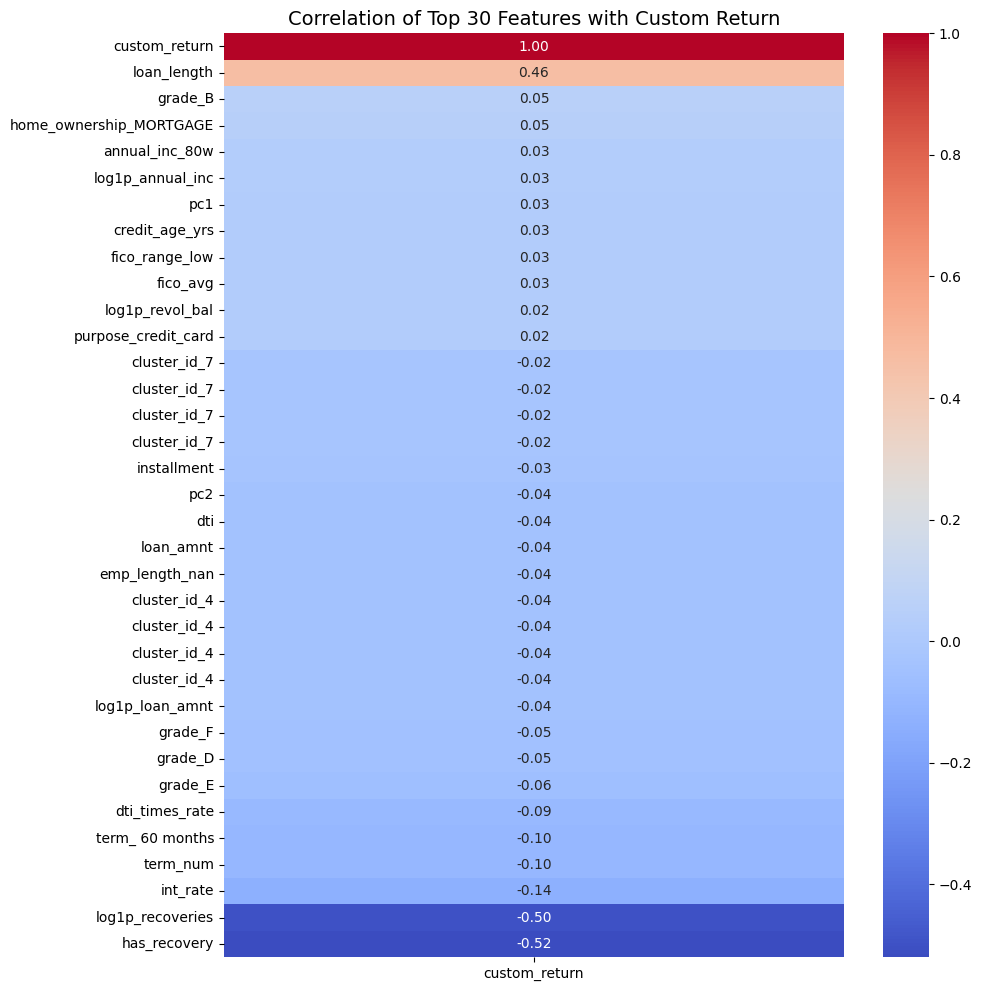

**Methodology**

To prepare the data for ANN modeling, categorical features were one-hot encoded into binary columns for compatibility with the network. Feature scaling was applied to ensure all numeric inputs were on a similar scale – critical for ANN stability and unbiased learning. The target variable is then binarized where any return >0 becomes 1 (profitable), else 0 (not profitable). The dataset was then split into 80% training and 20% testing sets to separate learning from evaluation, with a random seed of 42 used to ensure model reproducibility.

To improve the model’s performance, hyperparameter tuning was conducted. Rather than manually selecting key parameters such as number of neurons, batch size, or network depth, the tuning process was automated using Keras Tuner. Specifically, a Random Search approach was implemented to explore different configurations efficiently. The tuner tested various neuron counts between 10 and 100 in steps of 10, each using the ReLu activation function, which helps the model to learn complex, non-linear relationships in the data.

The hyperparameter search was carried out across 10 random trials, with each configuration trained twice for stability. During tuning, 10% of the training data was held out for validation, and models were trained for 20 epochs using a batch size of 64. The configuration that resulted in the lowest validation mean squared error was selected as the best-performing model. This optimal ANN model was then used to predict returns on the data.

# Experiments & Results

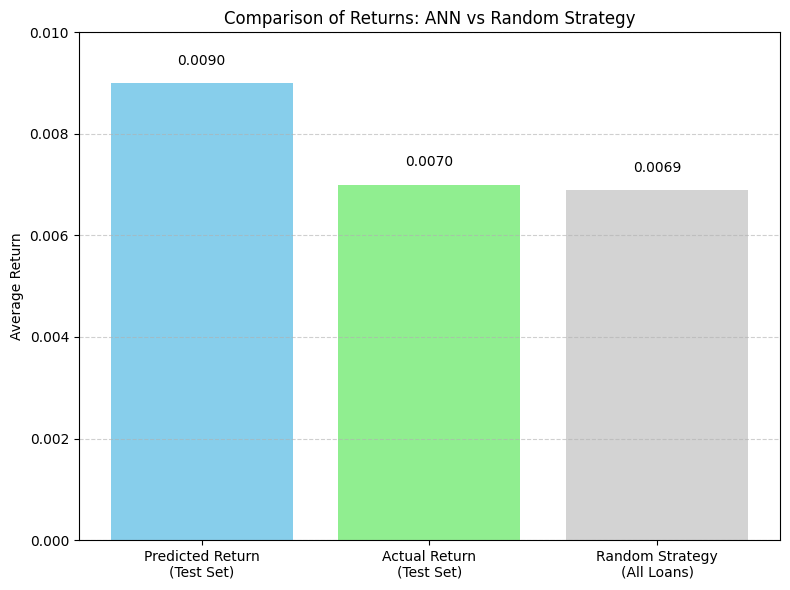

The ANN model achieved a predicted return of 0.0090 on the test set, slightly overestimating the actual return, but still showing close alignment. With a directional accuracy of 80.17%, the model appears well-calibrated and reliable in identifying return trends. Compared to a random strategy, which yielded a marginally lower average return, the ANN approach still outperforms in terms of profitability – demonstrating its ability to make more informed investment predictions, even if the absolute difference is modest.

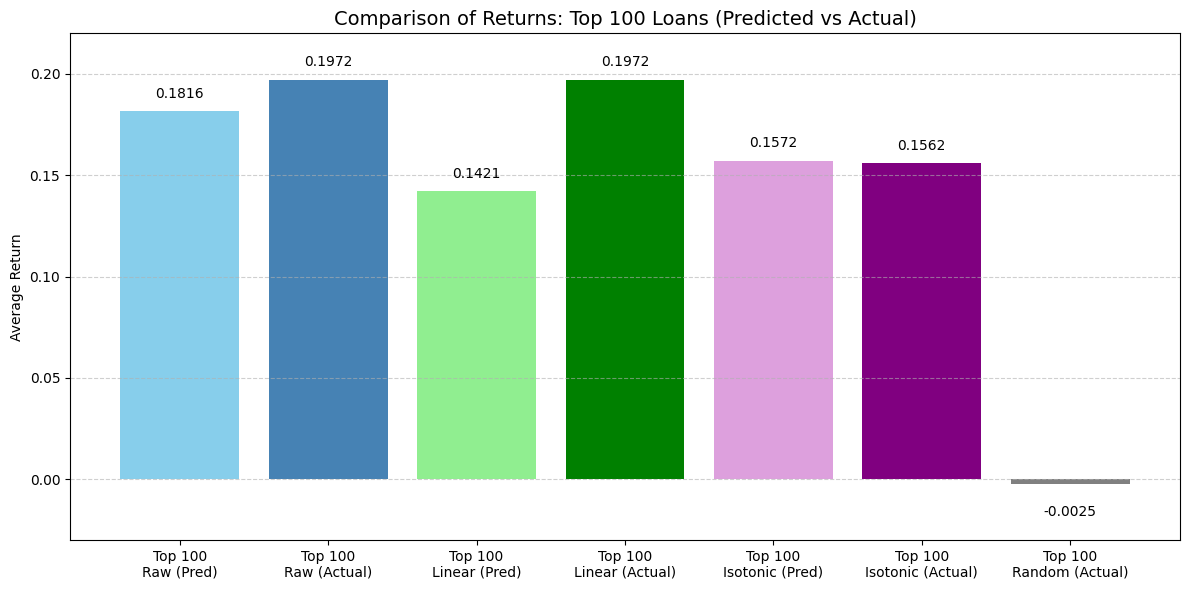

The ANN model proves highly effective in identifying high-return loans, as evidenced by all three top 100 selection strategies significantly outperforming random selection. The raw predictions closely align with actual returns, showing that even without calibration, the model can accurately target profitable loans. Applying linear scaling results in more conservative estimates still reflects strong performance, though slightly underestimating actual outcomes. Isotonic calibration further enhances accuracy by smoothing predictions and aligning them closely with real returns, offering a robust alternative with reduced risk of overfitting. In contrast, the average return from 100 randomly selected loans is negative, underscoring the ANN model’s strong ability to distinguish between high and low performing investments.

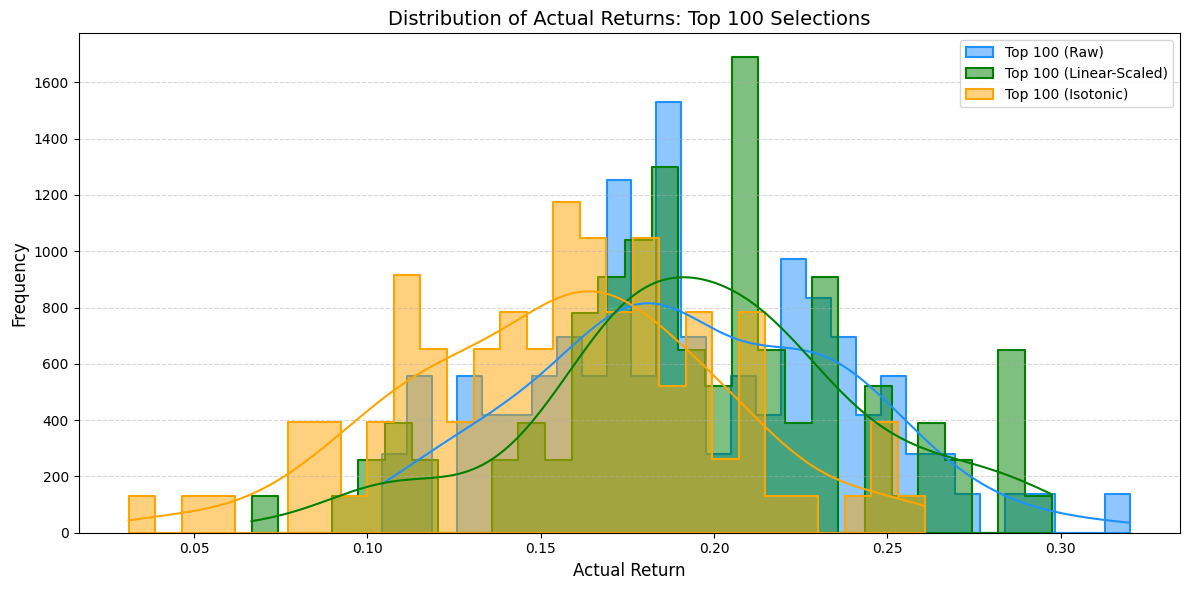

Both the raw and linear-scaled selections yield concentrated returns »0.18-0.20, indicating strong selection of profitable loans. In contrast, isotonic calibration produces a broader distribution, peaking at »0.15-0.20, which closely reflects real-world outcomes. This suggests isotonic calibration adds robustness by reducing overfitting, while still confirming the model’s consistent ability to prioritize high-return investments.

The ANN model shows strong predictive performance, with a low MSE of 0.00305, suggesting it makes only small errors on average. Its MAE of 2.56% indicates that predicted returns typically deviate only slightly from actual values. With an R squared of 0.55, the model captures over half of the variation in loan returns – an encouraging result given the noise nature of financial data. Additionally, the model achieves 80.17% directional accuracy, highlighting its reliability in identifying whether a loan will yield a positive or negative return, making it highly useful for investment decision-making.

Before arriving at the final model, we experimented with several ANN configurations using different return definitions – from simple return to non-log annualized return. Through this process, we found that logarithmic annualized return provided the best fit for the dataset. We also explored various approaches to input feature selection, initially relying on correlation analysis, but ultimately determined that using the f_regression method to automatically select top features was most effective. This streamlined approach improved the model’s performance and contributed to achieving a solid R squared score.
